In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
pip install modAL

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
x_raw=digits['data']
y_raw=digits['target']
n_labeled_examples = x_raw.shape[0]
training_indices = np.random.randint(low=0, high=n_labeled_examples + 1, size=179)

X_train = x_raw[training_indices]
y_train = y_raw[training_indices]



In [ ]:
training_indices

array([1710,  882, 1045,   27, 1686,  366,   95, 1115,    6,  918, 1362,
       1205,  303,  771, 1243,   82,  171, 1615,  340, 1592,  556, 1068,
       1489, 1092, 1079,  610,  101,  484,  756, 1232, 1117,  511, 1208,
       1428,  770, 1150,  652, 1181, 1034,  923, 1217, 1157,  250,   69,
       1310, 1287, 1511, 1124,  833,  243, 1697,  371,  679, 1266,  681,
        933, 1649,  960,  173,  922,  133, 1485,  719,  583,  442,  222,
        771,  147, 1398,    4,  161,  404,    0,  962, 1438, 1479, 1686,
       1233,  258, 1088, 1210,  466,  692,  654,  878, 1219,   88, 1062,
        505, 1295,  642, 1376, 1157,  740,  184,  730, 1187,  912, 1653,
       1078, 1047, 1553,  435,  178, 1496, 1062, 1460, 1220, 1439, 1419,
         20,  474,  917, 1408, 1020,   86,  126,  749, 1647, 1107,  653,
        764, 1644,  959,  753,  823,  327,  553,  156, 1646,  234, 1261,
        201,  233,  140,  707, 1173,  593, 1576, 1373, 1612,  621,  963,
        301,  912,  171, 1506,  394,  173,  665,  3

In [ ]:
pool=[]


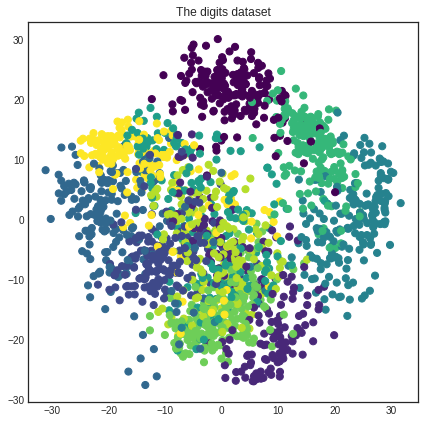

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# loading the digits dataset
digits = load_digits()

# visualizing the classes
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    pca = PCA(n_components=2).fit_transform(digits['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=digits['target'], cmap='viridis', s=50)
    plt.title('The digits dataset')
    plt.show()



In [ ]:
X_pool = np.delete(x_raw, training_indices, axis=0)
y_pool = np.delete(y_raw, training_indices, axis=0)

In [ ]:
from modAL.disagreement import KL_max_disagreement

In [ ]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier

from modAL.models import ActiveLearner, Committee

# initializing Committee members
n_members = 5
learner_list = list()

learner1 = ActiveLearner(
        estimator=RandomForestClassifier(max_depth=5), X_training=X_train, y_training=y_train
    )
learner2 = ActiveLearner(estimator=AdaBoostClassifier(), X_training=X_train, y_training=y_train)
learner3 = ActiveLearner(
        estimator=DecisionTreeClassifier(max_depth=5), X_training=X_train, y_training=y_train
    )
learner4= ActiveLearner(
        estimator=KNeighborsClassifier(3), X_training=X_train, y_training=y_train
    )
learner5=ActiveLearner(
        estimator=GaussianProcessClassifier(), X_training=X_train, y_training=y_train
    )
#learner5=ActiveLearner(
#        estimator=LinearDiscriminantAnalysis(), X_training=X_train, y_training=y_train
#   )
learner_list.append(learner1)
learner_list.append(learner2)
learner_list.append(learner3)
learner_list.append(learner4)
learner_list.append(learner5)

# assembling the committee
committee = Committee(learner_list=learner_list,query_strategy=KL_max_disagreement)

In [ ]:
predictions = committee.predict(x_raw)
is_correct = (predictions == y_raw)


In [ ]:
unqueried_score=committee.score(x_raw,y_raw)
unqueried_score

0.860879243183083

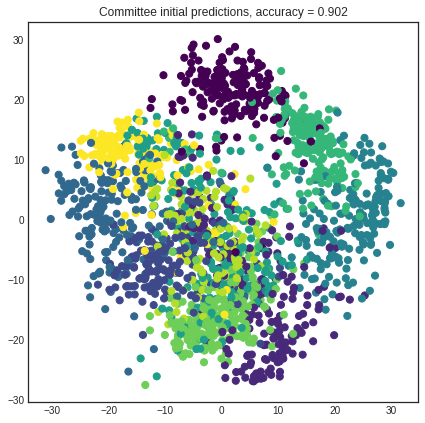

In [ ]:
unqueried_score = committee.score(digits['data'], digits['target'])

with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = committee.predict(digits['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Committee initial predictions, accuracy = %1.3f' % unqueried_score)
    plt.show()

Find disagreement values for data points to set threshold for querying

In [ ]:
x=x_raw
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
arr=KL_max_disagreement(committee,x)

np.delete(arr,np.amax(arr))
np.size(arr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  This is separate from the ipykernel package so we can avoid doing imports until


1797

In [ ]:
arr=KL_max_disagreement(committee,x)

for i in range(179):

  val=np.where(arr==np.amax(arr))
  print(val)
  np.delete(arr,np.amax(arr))


(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373]),)
(array([1373])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  import sys


In [ ]:
performance_history = [unqueried_score]


while committee.score(x_raw, y_raw) < 0.99:
    stream_idx = np.random.choice(range(len(X_pool)))
    if committee.query(X_pool[stream_idx].reshape(1, -1)) >= 0.9:
        committee.teach(X_pool[stream_idx].reshape(1, -1), y_pool[stream_idx].reshape(-1, ))
        new_score = committee.score(x_raw, y_raw)
        performance_history.append(new_score)
        X_pool = np.delete(X_pool, stream_idx, axis=0)
        y_pool = np.delete(y_pool, stream_idx)
        print('Data Point no. %d queried, new accuracy: %f' % (stream_idx, new_score))

Data Point no. 384 queried, new accuracy: 0.869783
Data Point no. 1546 queried, new accuracy: 0.871452
Data Point no. 1593 queried, new accuracy: 0.861992
Data Point no. 1032 queried, new accuracy: 0.860323
Data Point no. 1431 queried, new accuracy: 0.870339
Data Point no. 861 queried, new accuracy: 0.878130
Data Point no. 1273 queried, new accuracy: 0.882026
Data Point no. 725 queried, new accuracy: 0.879800
Data Point no. 449 queried, new accuracy: 0.890373
Data Point no. 852 queried, new accuracy: 0.887034
Data Point no. 1584 queried, new accuracy: 0.884808
Data Point no. 1202 queried, new accuracy: 0.885364
Data Point no. 1370 queried, new accuracy: 0.883695
Data Point no. 316 queried, new accuracy: 0.887590
Data Point no. 91 queried, new accuracy: 0.883695
Data Point no. 860 queried, new accuracy: 0.885921
Data Point no. 776 queried, new accuracy: 0.892042
Data Point no. 981 queried, new accuracy: 0.883695
Data Point no. 588 queried, new accuracy: 0.883139
Data Point no. 879 queri

KeyboardInterrupt: ignored

Text(0, 0.5, 'Classification Accuracy')

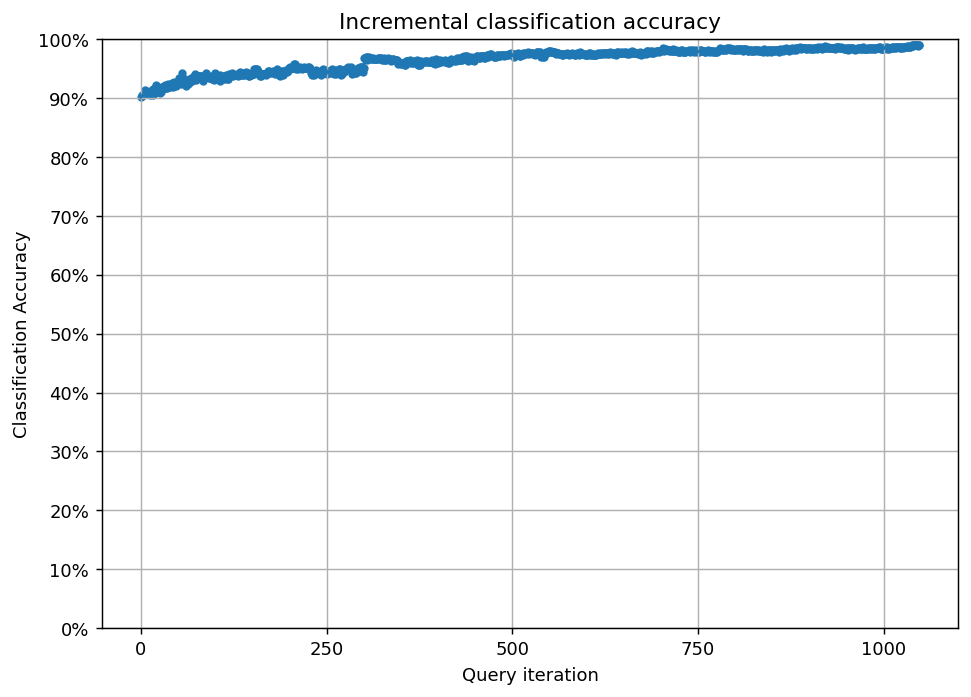

In [ ]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')


Text(0, 0.5, 'Classification Accuracy')

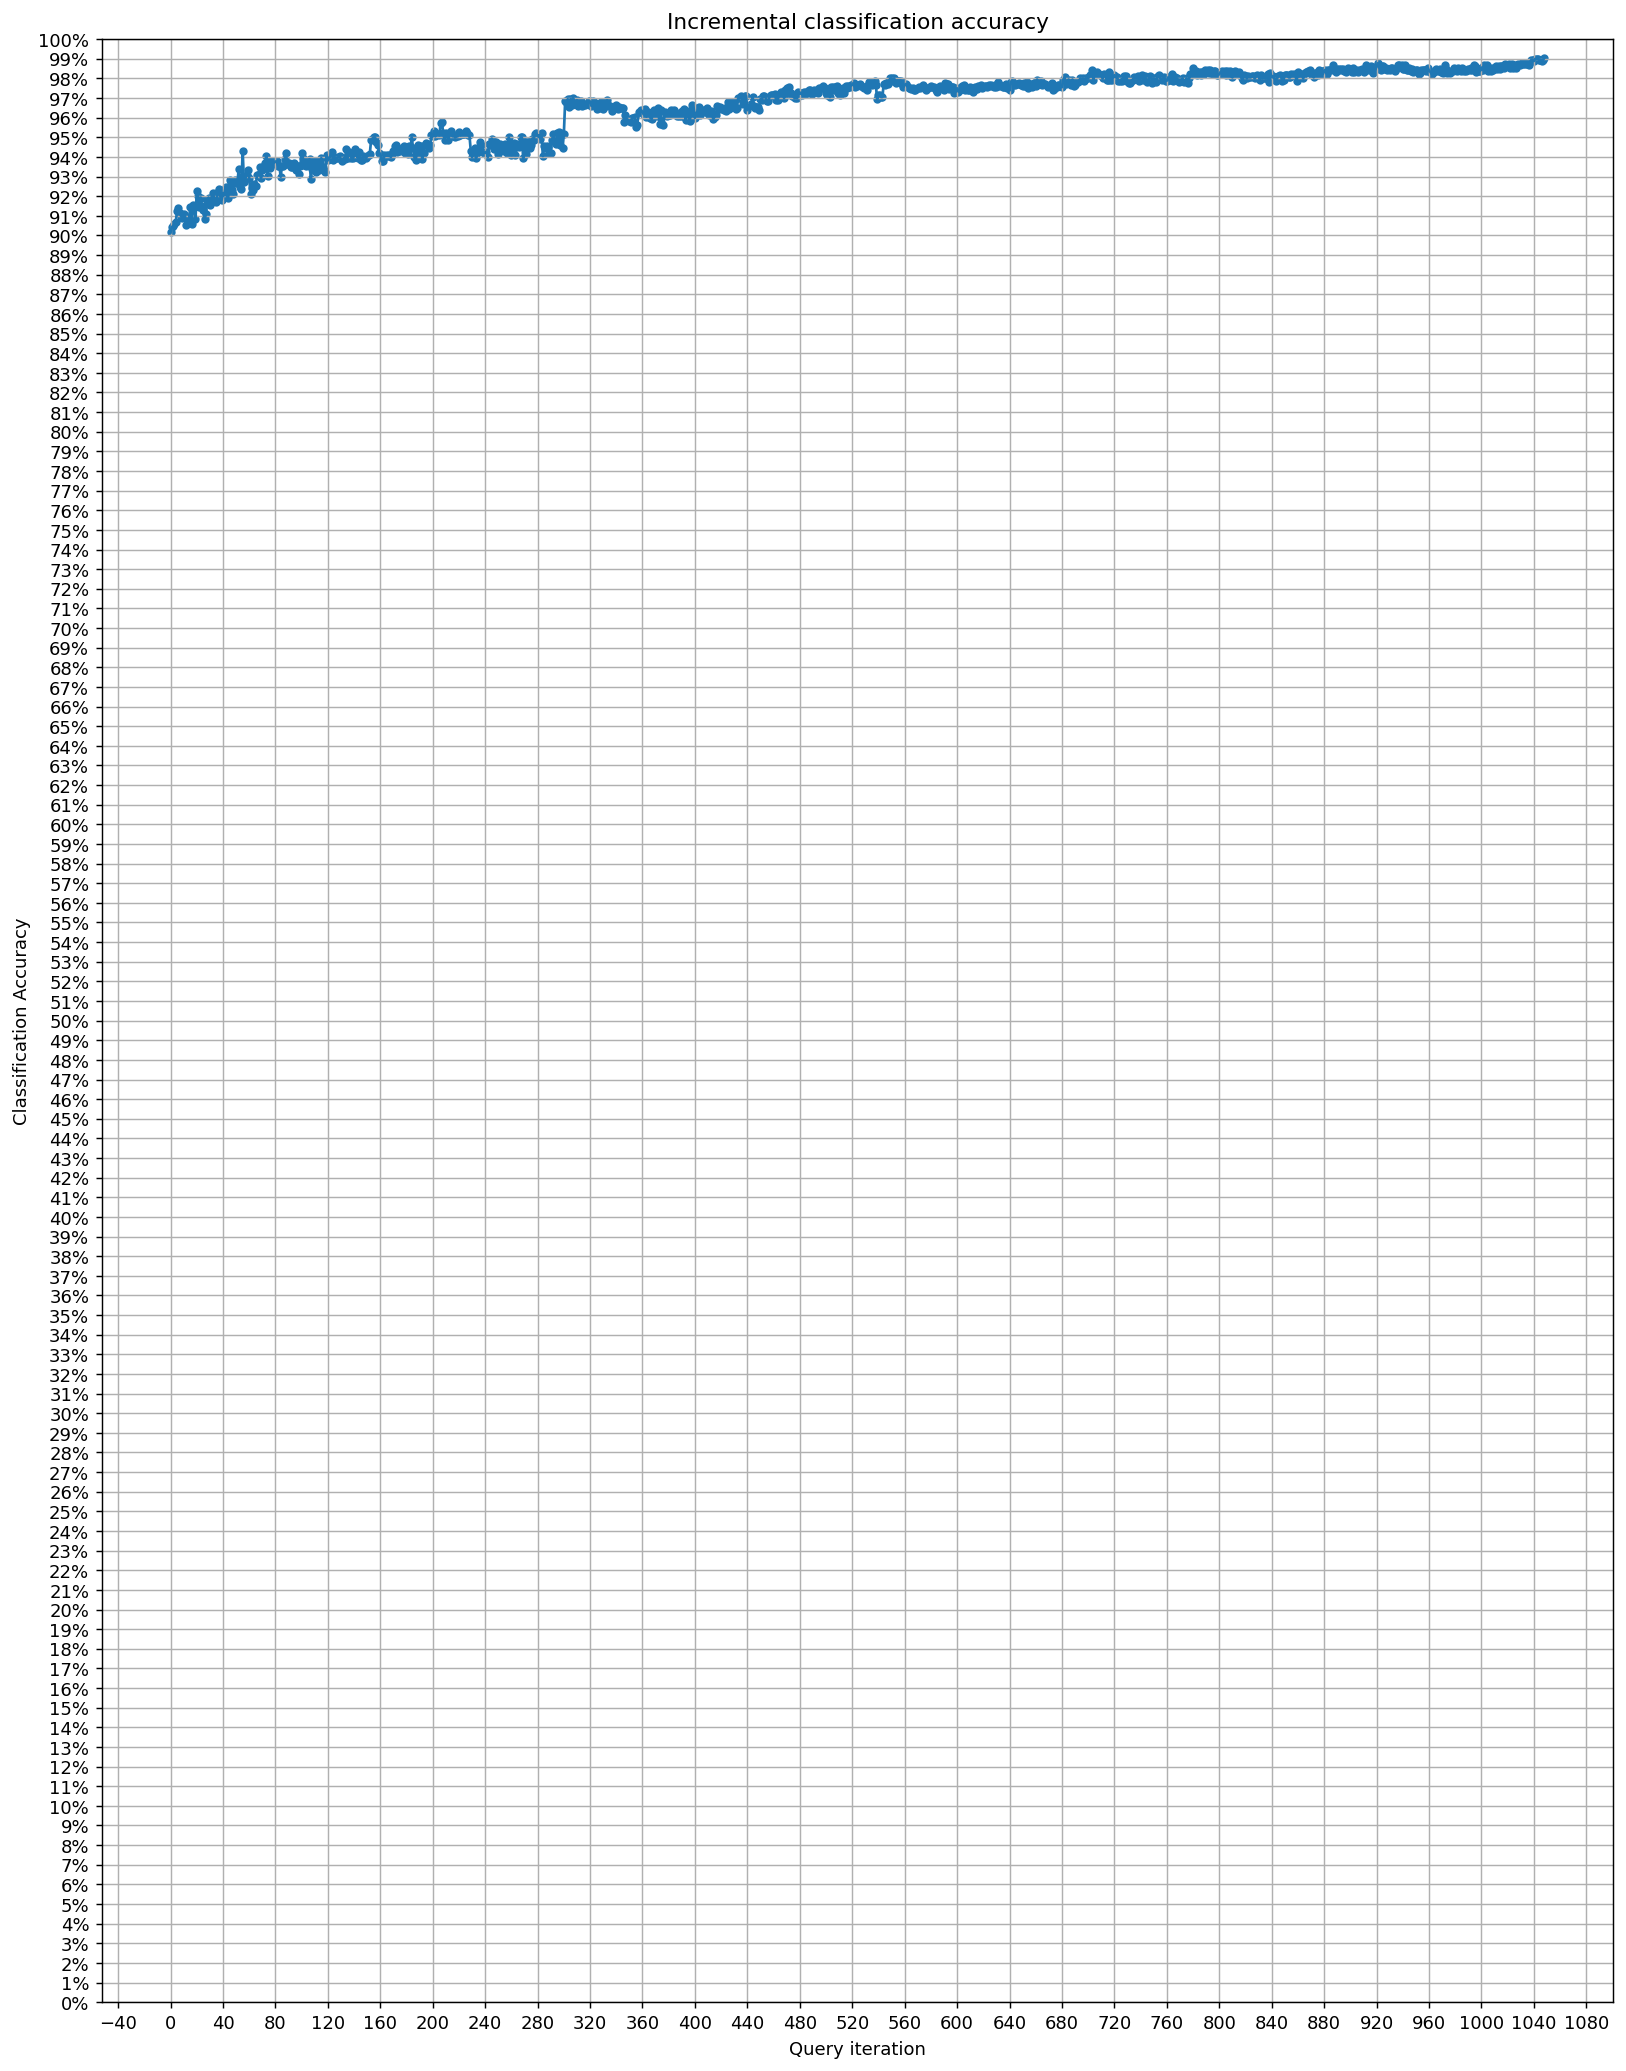

In [ ]:
fig, ax = plt.subplots(figsize=(15, 20), dpi=130)

ax.plot(performance_history)
ax.scatter(range(len(performance_history)), performance_history, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=30, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=100))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')


Queried Data Point and accuracy